In [81]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [82]:
features = pd.read_csv("D:/HAR/DSADS/train_set.csv", index_col=0)

In [83]:
features

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
5165,8.809194,15.0250,4.3556,5.189205,2.277983,0.091343,-2.004678,1.00730,-5.92770,2.982022,...,3.417762e-02,0.184872,-0.018434,-0.076292,0.152100,-0.275750,1.011097e-02,0.100553,0.233713,walkingTreadmillIncline
2090,9.546652,14.6510,6.6932,3.006984,1.734066,1.084879,-0.009572,2.59730,-2.65610,3.072429,...,8.786864e-03,0.093738,0.512712,-0.215849,-0.052728,-0.297740,2.481396e-03,0.049814,1.253961,ascendingStairs
128,8.985643,9.0347,8.9151,0.000347,0.018623,-0.250516,-1.565516,-1.50640,-1.68430,0.001280,...,5.483213e-07,0.000740,-0.026010,0.493849,0.495380,0.492190,4.598926e-07,0.000678,-0.094298,sitting
6660,9.740869,15.5220,3.9584,9.812555,3.132500,0.114171,-0.086898,2.18360,-2.39900,1.129580,...,1.079830e-02,0.103915,-0.410824,0.208695,0.260270,0.157460,6.428339e-04,0.025354,-0.488617,crossTrainer
4407,9.430798,14.0750,6.7814,3.414477,1.847830,0.886891,0.422660,3.20380,-1.81790,0.989326,...,2.009485e-02,0.141756,-0.183181,0.136347,0.355340,-0.000470,8.247633e-03,0.090816,0.378852,walkingTreadmillFlat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,-4.504877,-4.2627,-4.6577,0.006837,0.082688,0.600412,1.186911,1.30810,0.97004,0.003962,...,4.055941e-07,0.000637,-0.048409,-0.123748,-0.121200,-0.126140,6.071770e-07,0.000779,0.050053,lyingBack
8096,8.054508,11.7240,1.7905,5.864172,2.421605,-0.913331,-1.586920,0.93915,-5.92080,1.135545,...,8.485086e-03,0.092115,0.543072,0.130470,0.211210,-0.004338,2.270648e-03,0.047651,-0.760360,rowing
2586,8.991326,14.4730,5.7043,3.558577,1.886419,1.041456,-2.122556,-0.49354,-5.39360,0.923036,...,4.020240e-03,0.063405,-0.082848,0.416809,0.514420,0.311950,2.202111e-03,0.046927,-0.282732,decendingStairs
99,9.629403,9.6952,9.5096,0.000730,0.027024,-0.801447,-1.098992,-0.94908,-1.23120,0.003814,...,5.783364e-07,0.000760,0.220546,0.639001,0.640790,0.636360,8.598473e-07,0.000927,-0.402538,sitting


In [84]:
indexes = features[(features['activity'] == 'crossTrainer')].index
features.drop(indexes , inplace=True)

In [85]:
indexes = features[(features['activity'] == 'stepper')].index
features.drop(indexes , inplace=True)

In [86]:
indexes = features[(features['activity'] == 'cyclingVertical')].index
features.drop(indexes , inplace=True)

In [87]:
indexes = features[(features['activity'] == 'standingInElevatorStill')].index
features.drop(indexes , inplace=True)

In [88]:
indexes = features[(features['activity'] == 'cyclingHorizontal')].index
features.drop(indexes , inplace=True)

In [89]:
indexes = features[(features['activity'] == 'basketBall')].index
features.drop(indexes , inplace=True)

In [90]:
indexes = features[(features['activity'] == 'rowing')].index
features.drop(indexes , inplace=True)

In [91]:
indexes = features[(features['activity'] == 'movingInElevator')].index
features.drop(indexes , inplace=True)

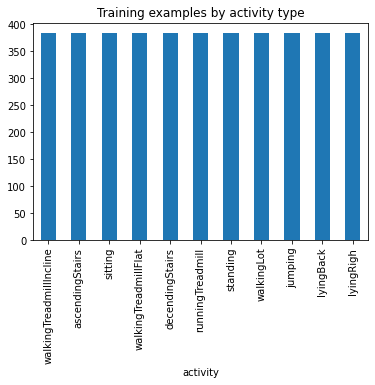

In [92]:
features['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [93]:
features.to_csv("D:/HAR/DSADS/features.csv", mode='w')

# Check Point

In [94]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [95]:
features_RA = features.filter(regex='RA_') 
features_LA = features.filter(regex='LA_') 

In [96]:
features_RA.insert(3, 'activity', features['activity'])

In [97]:
features_LA.insert(3, 'activity', features['activity'])

In [98]:
features_RA['activity'].value_counts()

activity
walkingTreadmillIncline    384
ascendingStairs            384
sitting                    384
walkingTreadmillFlat       384
decendingStairs            384
runningTreadmill           384
standing                   384
walkingLot                 384
jumping                    384
lyingBack                  384
lyingRigh                  384
Name: count, dtype: int64

In [99]:
features_LA['activity'].value_counts()

activity
walkingTreadmillIncline    384
ascendingStairs            384
sitting                    384
walkingTreadmillFlat       384
decendingStairs            384
runningTreadmill           384
standing                   384
walkingLot                 384
jumping                    384
lyingBack                  384
lyingRigh                  384
Name: count, dtype: int64

In [100]:
features_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
5165,2.351139,5.64650,0.46700,walkingTreadmillIncline,0.774687,0.880163,0.768796,9.403685,11.6300,4.97590,...,-0.56634,5.389561e-04,0.023215,0.346084,-0.460872,-0.42036,-0.50061,4.441364e-04,0.021075,-0.244725
2090,9.599680,18.49000,5.34570,ascendingStairs,6.630991,2.575071,1.026940,2.365855,5.5863,-2.48070,...,-0.12902,1.510261e-02,0.122893,0.371881,-0.543689,-0.38479,-0.65672,5.617976e-03,0.074953,0.372957
128,1.322197,1.37900,1.27380,sitting,0.000328,0.018102,-0.018647,9.688045,9.7155,9.65930,...,-0.81686,6.753348e-07,0.000822,-0.221352,0.541016,0.54349,0.53920,6.205362e-07,0.000788,0.252162
4407,2.820124,4.08090,0.99285,walkingTreadmillFlat,0.395163,0.628620,-0.188650,7.757473,10.2130,5.65190,...,-0.67300,4.667319e-04,0.021604,0.522992,-0.805613,-0.78152,-0.83781,1.779003e-04,0.013338,-0.338441
4556,9.548158,15.90200,6.39190,walkingTreadmillFlat,4.702378,2.168497,1.028531,3.875697,6.9972,0.97576,...,-0.68275,8.624170e-02,0.293669,0.556713,-0.786478,-0.40195,-1.29080,4.844122e-02,0.220094,-0.406016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,-2.316187,10.09300,-11.56400,runningTreadmill,35.159535,5.929548,0.385902,9.885249,27.3140,-2.82780,...,-0.83715,1.099206e-02,0.104843,0.411054,-0.554934,-0.38165,-0.76996,1.240121e-02,0.111361,-0.395560
1332,-1.024053,-0.96665,-1.06920,lyingBack,0.000439,0.020960,0.458807,4.360321,4.4343,4.24960,...,0.07968,1.618689e-06,0.001272,0.139961,-0.964029,-0.96197,-0.96577,4.598352e-07,0.000678,-0.112448
2586,8.112966,14.74100,5.29110,decendingStairs,4.615127,2.148285,1.433773,4.988290,7.5231,3.69540,...,-0.22150,2.978403e-03,0.054575,0.269241,0.344629,0.38781,0.25939,7.566578e-04,0.027507,-1.099437
99,1.188006,1.38230,1.08470,sitting,0.001904,0.043635,0.650080,9.604255,9.8233,9.26820,...,-0.93607,1.205317e-05,0.003472,0.503936,0.315898,0.33228,0.30299,7.458657e-05,0.008636,0.577970


In [101]:
features_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
5165,2.618084,4.487900,-0.39461,walkingTreadmillIncline,0.711532,0.843523,-0.242275,-6.245767,-3.5797,-9.2344,...,0.62953,1.049534e-03,0.032397,-0.084460,-0.866369,-0.787590,-0.94424,8.266735e-04,0.028752,0.121546
2090,9.697200,14.515000,6.65810,ascendingStairs,3.613272,1.900861,1.083813,-1.140953,1.2985,-2.9856,...,0.25521,2.537214e-02,0.159286,-0.125723,0.177918,0.414270,-0.13983,2.304770e-02,0.151815,-0.235036
128,0.988547,1.055600,0.94100,sitting,0.000700,0.026461,0.756643,-6.087941,-6.0070,-6.1545,...,0.15776,1.230129e-06,0.001109,0.461581,-0.594644,-0.591300,-0.59684,1.424056e-06,0.001193,0.506487
4407,2.199180,3.709600,0.90338,walkingTreadmillFlat,0.307326,0.554370,0.012662,-6.473578,-4.9925,-8.0333,...,0.91529,8.187664e-04,0.028614,1.652886,-0.998493,-0.913460,-1.06070,7.278150e-04,0.026978,0.339392
4556,9.235691,16.064000,6.14050,walkingTreadmillFlat,4.263624,2.064854,1.011265,-3.232433,-1.0981,-5.0258,...,0.36112,5.928289e-02,0.243481,-0.405214,-0.401414,0.257250,-0.89992,1.377655e-01,0.371168,0.147174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,-1.226799,9.334800,-12.70400,runningTreadmill,35.691986,5.974277,0.073129,-9.501742,2.4630,-27.4900,...,0.38163,4.058843e-02,0.201466,-0.117298,-0.772164,-0.517990,-1.00110,1.793382e-02,0.133917,0.214578
1332,-0.146797,-0.085741,-0.19294,lyingBack,0.000308,0.017556,0.292249,1.069366,1.1294,1.0103,...,0.38021,6.768429e-07,0.000823,-0.190710,-0.881865,-0.880230,-0.88348,5.186347e-07,0.000720,0.141071
2586,7.909270,12.910000,4.83550,decendingStairs,3.334214,1.825983,1.002466,-4.194397,-2.7726,-6.6133,...,-0.23153,5.738651e-04,0.023955,0.367591,-0.402501,-0.332690,-0.47874,1.260669e-03,0.035506,0.006483
99,1.678871,1.852400,1.45840,sitting,0.003987,0.063144,0.086201,-8.617946,-8.3011,-9.0132,...,0.63224,2.100914e-05,0.004584,-1.076902,-0.735145,-0.730680,-0.74388,7.695932e-06,0.002774,-0.941496


In [102]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = features_RA[["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"]]
              
y= features_RA['activity']
              
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_RA_X = pd.DataFrame(data = X, columns = ["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"])
scaled_RA_X['label'] = y.values


scaled_RA_X.head(10)

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew,label
0,-0.673184,-0.517529,-0.169107,-0.374607,-0.451050,0.672788,1.349639,0.309357,0.834508,-0.294207,...,-0.345302,-0.476255,0.483378,-0.422434,-0.596713,-0.189862,-0.401071,-0.492916,-0.362155,walkingTreadmillIncline
1,1.003419,0.667160,0.676926,-0.233088,0.066592,1.055952,-0.564283,-0.346822,-0.731557,-0.281875,...,0.043560,0.583541,0.531806,-0.607411,-0.516263,-0.484089,-0.191867,0.169279,0.701603,ascendingStairs
2,-0.911181,-0.911165,-0.029197,-0.393320,-0.714332,-0.496017,1.426971,0.101495,1.818134,-0.335686,...,-0.359675,-0.714351,-0.581841,1.815363,1.583278,1.769913,-0.419004,-0.742251,0.493572,sitting
3,-0.564707,-0.661941,-0.077918,-0.383779,-0.527874,-0.748354,0.901956,0.155510,0.976484,-0.315719,...,-0.347231,-0.493389,0.815480,-1.192440,-1.413568,-0.825397,-0.411836,-0.588003,-0.523551,walkingTreadmillFlat
4,0.991502,0.428442,0.858351,-0.279694,-0.057580,1.058313,-0.153685,-0.193637,-0.005617,-0.268117,...,1.943034,2.399285,0.878781,-1.149700,-0.555075,-1.679167,1.539690,1.953128,-0.639928,walkingTreadmillFlat
5,-1.111093,-0.990598,-0.182504,-0.393317,-0.713486,-0.514429,0.431618,-0.292590,1.046086,-0.335678,...,-0.359582,-0.701392,-0.764239,0.168318,-0.023834,0.329215,-0.417733,-0.682350,1.048799,sitting
6,0.999832,0.344318,0.845120,-0.296045,-0.107078,0.586099,-0.440765,-0.374063,-0.401435,-0.295558,...,0.969152,1.648835,-0.152389,-1.394449,-0.846072,-1.542524,0.377980,0.973598,0.194827,walkingTreadmillFlat
7,0.900215,0.363504,0.715597,-0.270061,-0.030081,0.706476,-0.036782,-0.065109,0.136157,-0.264942,...,1.930921,2.391062,-0.005638,-1.235650,-0.727013,-1.640907,0.878863,1.450031,-0.929991,walkingTreadmillFlat
8,-1.333050,-0.918729,-0.735997,-0.376187,-0.462642,-1.180505,0.435914,-0.016306,0.672286,-0.318348,...,-0.330965,-0.374339,0.248597,-1.136964,-1.189338,-0.896829,-0.353132,-0.255771,0.469538,walkingTreadmillIncline
9,-0.527112,-0.631335,0.038538,-0.385568,-0.546790,-0.359292,0.863314,0.107521,0.716286,-0.316950,...,-0.352939,-0.553987,0.204920,-1.239188,-1.445776,-0.843246,-0.414682,-0.624501,0.686138,walkingTreadmillFlat


In [103]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = features_LA[["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"]]
              
y= features_LA['activity']
              
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_LA_X = pd.DataFrame(data = X, columns = ["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"])
scaled_LA_X['label'] = y.values

scaled_LA_X.head(10)

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew,label
0,-0.504594,-0.573730,-0.275855,-0.384690,-0.456270,-0.783499,-0.674469,-0.634946,-0.106170,-0.272318,...,-0.329059,-0.405029,-0.067982,-1.330724,-1.297905,-1.150260,-0.298126,-0.414442,0.122005,walkingTreadmillIncline
1,0.996213,0.326471,0.945505,-0.312616,-0.133514,1.144793,0.839661,0.460361,0.557738,-0.270246,...,0.145582,0.752597,-0.136408,0.922391,0.946644,0.510201,0.040683,0.616171,-0.538425,ascendingStairs
2,-0.850063,-0.881871,-0.044559,-0.402345,-0.705680,0.669049,-0.627657,-1.179950,0.221056,-0.298188,...,-0.349516,-0.690467,0.837505,-0.744460,-0.931321,-0.433158,-0.310708,-0.645237,0.834959,sitting
3,-0.593403,-0.643604,-0.051074,-0.394729,-0.544534,-0.412790,-0.742040,-0.952163,0.021442,-0.288481,...,-0.333562,-0.439537,2.813019,-1.615789,-1.532975,-1.390657,-0.299633,-0.429298,0.525480,walkingTreadmillFlat
4,0.898371,0.465536,0.855869,-0.296462,-0.083455,1.039301,0.219311,-0.077750,0.340975,-0.278817,...,0.807329,1.520710,-0.599881,-0.327556,0.653399,-1.058775,1.789807,2.453187,0.169472,walkingTreadmillFlat
5,-0.361211,-0.674568,0.355339,-0.402348,-0.706385,0.297291,-1.357049,-1.734249,-0.042603,-0.298194,...,-0.349509,-0.689175,-0.024040,0.705232,0.326482,0.951008,-0.310669,-0.638493,0.503112,sitting
6,0.951166,0.311658,0.966719,-0.319638,-0.156677,0.736679,0.427700,0.233677,0.417483,-0.275847,...,0.346420,1.022300,-0.071381,0.860840,1.041852,-0.038649,0.755973,1.559882,-1.210710,walkingTreadmillFlat
7,0.896312,0.523442,0.902523,-0.299496,-0.092549,1.310785,0.223496,-0.100899,0.309548,-0.278377,...,0.316201,0.984481,-1.268119,-0.297794,0.744181,-1.027296,2.191150,2.737172,0.611391,walkingTreadmillFlat
8,-0.975681,-0.720569,-0.517381,-0.379726,-0.422347,-0.723217,-0.516319,-0.844680,0.084137,-0.287388,...,-0.340184,-0.500826,0.381023,-1.841454,-1.725408,-1.617925,-0.285536,-0.314802,0.499906,walkingTreadmillIncline
9,-0.570262,-0.657977,-0.009352,-0.394811,-0.545445,-0.701204,-0.777754,-0.901172,0.035657,-0.288838,...,-0.339695,-0.495675,0.964435,-1.607577,-1.600412,-1.401391,-0.297846,-0.411786,-1.389740,walkingTreadmillFlat


In [104]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(scaled_RA_X, 
                                                    scaled_RA_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [105]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(scaled_LA_X, 
                                                    scaled_LA_X["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [106]:
X_train_RA['label'].value_counts()

label
standing                   308
decendingStairs            297
jumping                    296
walkingLot                 293
walkingTreadmillFlat       289
lyingBack                  287
lyingRigh                  286
ascendingStairs            286
walkingTreadmillIncline    279
sitting                    274
runningTreadmill           273
Name: count, dtype: int64

In [107]:
X_test_RA['label'].value_counts()

label
runningTreadmill           111
sitting                    110
walkingTreadmillIncline    105
lyingRigh                   98
ascendingStairs             98
lyingBack                   97
walkingTreadmillFlat        95
walkingLot                  91
jumping                     88
decendingStairs             87
standing                    76
Name: count, dtype: int64

In [108]:
X_train_LA['label'].value_counts()

label
standing                   308
decendingStairs            297
jumping                    296
walkingLot                 293
walkingTreadmillFlat       289
lyingBack                  287
lyingRigh                  286
ascendingStairs            286
walkingTreadmillIncline    279
sitting                    274
runningTreadmill           273
Name: count, dtype: int64

In [109]:
X_test_LA['label'].value_counts()

label
runningTreadmill           111
sitting                    110
walkingTreadmillIncline    105
lyingRigh                   98
ascendingStairs             98
lyingBack                   97
walkingTreadmillFlat        95
walkingLot                  91
jumping                     88
decendingStairs             87
standing                    76
Name: count, dtype: int64

In [110]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [111]:
print(X_train_RA.shape, X_test_RA.shape)
print(y_train_RA.shape, y_test_RA.shape)

(3168, 55) (1056, 55)
(3168,) (1056,)


In [112]:
print(X_train_LA.shape, X_test_LA.shape)
print(y_train_LA.shape, y_test_LA.shape)

(3168, 55) (1056, 55)
(3168,) (1056,)


In [113]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

unique, counts = np.unique(y_train_RA, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test_RA, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[['ascendingStairs' 286]
 ['decendingStairs' 297]
 ['jumping' 296]
 ['lyingBack' 287]
 ['lyingRigh' 286]
 ['runningTreadmill' 273]
 ['sitting' 274]
 ['standing' 308]
 ['walkingLot' 293]
 ['walkingTreadmillFlat' 289]
 ['walkingTreadmillIncline' 279]]
Test data label statistics::
[['ascendingStairs' 98]
 ['decendingStairs' 87]
 ['jumping' 88]
 ['lyingBack' 97]
 ['lyingRigh' 98]
 ['runningTreadmill' 111]
 ['sitting' 110]
 ['standing' 76]
 ['walkingLot' 91]
 ['walkingTreadmillFlat' 95]
 ['walkingTreadmillIncline' 105]]


In [114]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train_RA, y_train_RA = create_dataset(X_train_RA[["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"]], X_train_RA.label, TIME_STEPS, STEP)

X_test_RA, y_test_RA = create_dataset(X_test_RA[["RA_xacc_mean", "RA_xacc_max", "RA_xacc_min","RA_xacc_var", \
       "RA_xacc_std", "RA_xacc_skew", "RA_yacc_mean", "RA_yacc_max", "RA_yacc_min", \
       "RA_yacc_var", "RA_yacc_std", "RA_yacc_skew", "RA_zacc_mean", "RA_zacc_max", \
       "RA_zacc_min", "RA_zacc_var", "RA_zacc_std", "RA_zacc_skew", "RA_xgyro_mean", \
       "RA_xgyro_max", "RA_xgyro_min", "RA_xgyro_var", "RA_xgyro_std", \
       "RA_xgyro_skew", "RA_ygyro_mean", "RA_ygyro_max", "RA_ygyro_min", \
       "RA_ygyro_var", "RA_ygyro_std", "RA_ygyro_skew", "RA_zgyro_mean", \
       "RA_zgyro_max", "RA_zgyro_min", "RA_zgyro_var", "RA_zgyro_std", \
       "RA_zgyro_skew", "RA_xmag_mean", "RA_xmag_max", "RA_xmag_min", "RA_xmag_var",  \
       "RA_xmag_std", "RA_xmag_skew", "RA_ymag_mean", "RA_ymag_max", "RA_ymag_min", \
       "RA_ymag_var", "RA_ymag_std", "RA_ymag_skew", "RA_zmag_mean", "RA_zmag_max", \
       "RA_zmag_min", "RA_zmag_var", "RA_zmag_std", "RA_zmag_skew"]], X_test_RA.label, TIME_STEPS, STEP)

print(X_train_RA.shape, y_train_RA.shape)

<ipython-input-114-7c7294055c1b>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-114-7c7294055c1b>:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])


(3167, 1, 54) (3167, 1)


<ipython-input-114-7c7294055c1b>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-114-7c7294055c1b>:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])


In [115]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train_LA, y_train_LA = create_dataset(X_train_LA[["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"]], X_train_LA.label, TIME_STEPS, STEP)

X_test_LA, y_test_LA = create_dataset(X_test_LA[["LA_xacc_mean", "LA_xacc_max", "LA_xacc_min","LA_xacc_var", \
       "LA_xacc_std", "LA_xacc_skew", "LA_yacc_mean", "LA_yacc_max", "LA_yacc_min", \
       "LA_yacc_var", "LA_yacc_std", "LA_yacc_skew", "LA_zacc_mean", "LA_zacc_max", \
       "LA_zacc_min", "LA_zacc_var", "LA_zacc_std", "LA_zacc_skew", "LA_xgyro_mean", \
       "LA_xgyro_max", "LA_xgyro_min", "LA_xgyro_var", "LA_xgyro_std", \
       "LA_xgyro_skew", "LA_ygyro_mean", "LA_ygyro_max", "LA_ygyro_min", \
       "LA_ygyro_var", "LA_ygyro_std", "LA_ygyro_skew", "LA_zgyro_mean", \
       "LA_zgyro_max", "LA_zgyro_min", "LA_zgyro_var", "LA_zgyro_std", \
       "LA_zgyro_skew", "LA_xmag_mean", "LA_xmag_max", "LA_xmag_min", "LA_xmag_var",  \
       "LA_xmag_std", "LA_xmag_skew", "LA_ymag_mean", "LA_ymag_max", "LA_ymag_min", \
       "LA_ymag_var", "LA_ymag_std", "LA_ymag_skew", "LA_zmag_mean", "LA_zmag_max", \
       "LA_zmag_min", "LA_zmag_var", "LA_zmag_std", "LA_zmag_skew"]], X_test_LA.label, TIME_STEPS, STEP)

print(X_train_LA.shape, y_train_LA.shape)

<ipython-input-115-f4f848becf54>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-115-f4f848becf54>:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])


(3167, 1, 54) (3167, 1)


<ipython-input-115-f4f848becf54>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-115-f4f848becf54>:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])


In [116]:
from sklearn.preprocessing import OneHotEncoder

enc1 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc1 = enc1.fit(y_train_RA)

y_train_RA = enc1.transform(y_train_RA)
y_test_RA = enc1.transform(y_test_RA)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
from sklearn.preprocessing import OneHotEncoder

enc2 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc2 = enc2.fit(y_train_LA)

y_train_LA = enc2.transform(y_train_LA)
y_test_LA = enc2.transform(y_test_LA)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
print("X_train.shape: ", X_train_RA.shape)
print("X_test.shape ", X_test_RA.shape)
print("y_train.shape ", y_train_RA.shape)
print("y_test.shape ", y_test_RA.shape)

X_train.shape:  (3167, 1, 54)
X_test.shape  (1055, 1, 54)
y_train.shape  (3167, 11)
y_test.shape  (1055, 11)


In [160]:
print("X_train.shape: ", X_train_RA.shape)
print("X_test.shape ", X_test_RA.shape)
print("y_train.shape ", y_train_RA.shape)
print("y_test.shape ", y_test_RA.shape)

X_train.shape:  (3167, 1, 54)
X_test.shape  (1055, 1, 54)
y_train.shape  (3167, 11)
y_test.shape  (1055, 11)


In [161]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [162]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [163]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train_RA.shape[1],X_train_RA.shape[2],y_train_RA.shape[1]

In [164]:
n_timesteps, n_features, n_outputs

(1, 54, 11)

In [165]:
# Training and evaluating the LSTM model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train_RA.shape[1], X_train_RA.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train_RA.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])


In [166]:
history = model.fit(X_train_RA, y_train_RA, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
90/90 [==============================] - 4s 11ms/step - loss: 1.3419 - acc: 0.6323 - val_loss: 0.5994 - val_acc: 0.8139
Epoch 2/10
90/90 [==============================] - 0s 5ms/step - loss: 0.4965 - acc: 0.8337 - val_loss: 0.2947 - val_acc: 0.9085
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 0.3040 - acc: 0.9060 - val_loss: 0.2048 - val_acc: 0.9243
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.2139 - acc: 0.9298 - val_loss: 0.1365 - val_acc: 0.9653
Epoch 5/10
90/90 [==============================] - 0s 5ms/step - loss: 0.1511 - acc: 0.9498 - val_loss: 0.1164 - val_acc: 0.9685
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.1184 - acc: 0.9618 - val_loss: 0.0881 - val_acc: 0.9748
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0959 - acc: 0.9702 - val_loss: 0.0722 - val_acc: 0.9811
Epoch 8/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0666 - acc: 0.9

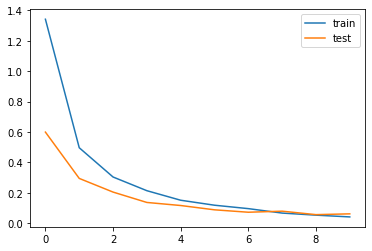

In [167]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [168]:
model.evaluate(X_test_RA, y_test_RA)
y_pred = model.predict(X_test_RA)

33/33 [==============================] - 1s 2ms/step


In [169]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_RA,axis=1)
Y_pred = np.argmax(model.predict(X_test_RA),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

33/33 [==============================] - 0s 2ms/step
Confusion Matrix
[[ 98   0   0   0   0   0   0   0   0   0   0]
 [  0  87   0   0   0   0   0   0   0   0   0]
 [  0   0  88   0   0   0   0   0   0   0   0]
 [  1   0   0  96   0   0   0   0   0   0   0]
 [  1   0   0   0  96   0   0   0   0   0   0]
 [  0   0   0   0   0 111   0   0   0   0   0]
 [  0   1   0   0   0   0 107   0   0   0   2]
 [  0   0   0   0   0   0   0  76   0   0   0]
 [  0   0   0   0   0   0   0   0  91   0   0]
 [  1   0   0   0   0   1   0   0   1  88   4]
 [  0   0   0   0   0   0   0   0   1   1 103]]


In [170]:
model.evaluate(X_test_LA, y_test_LA)
y_pred = model.predict(X_test_LA)

33/33 [==============================] - 0s 2ms/step


In [171]:
%time
print(X_test_RA.shape,y_test_RA.shape)
base_loss,base_accuracy=model.evaluate(X_test_RA,y_test_RA,batch_size=batch_size,verbose=1)

cnn_file='D:/HAR/DSADS/CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

Wall time: 0 ns
(1055, 1, 54) (1055, 11)
33/33 [==============================] - 0s 2ms/step - loss: 0.0535 - acc: 0.9867
model saved at  D:/HAR/DSADS/CNN_Model.h5
Accuracy >98.672986
Base Loss >0.05


<ipython-input-171-a778ae11a99b>:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, cnn_file, include_optimizer=False)


# Fine-Tunning

https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [172]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [186]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 3

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(11, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  4


In [187]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.bidirectional.Bidirectio...,bidirectional_2,False
1,<keras.src.layers.regularization.dropout.Dropo...,dropout_2,False
2,<keras.src.layers.core.dense.Dense object at 0...,dense_11,False
3,<keras.src.layers.core.dense.Dense object at 0...,dense_12,True


In [188]:
history2 = new_model.fit(X_train_LA, y_train_LA, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
90/90 [==============================] - 4s 10ms/step - loss: 1.7568 - accuracy: 0.4586 - val_loss: 0.9313 - val_accuracy: 0.7508
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: 0.8312 - accuracy: 0.7698 - val_loss: 0.6523 - val_accuracy: 0.8391
Epoch 3/10
90/90 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.8175 - val_loss: 0.5270 - val_accuracy: 0.8423
Epoch 4/10
90/90 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.8319 - val_loss: 0.4694 - val_accuracy: 0.8423
Epoch 5/10
90/90 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.8488 - val_loss: 0.4366 - val_accuracy: 0.8644
Epoch 6/10
90/90 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.8512 - val_loss: 0.4068 - val_accuracy: 0.8644
Epoch 7/10
90/90 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8632 - val_loss: 0.3980 - val_accuracy: 0.8770
Epoch 8/10
90/90 [=

# 미세조정

In [190]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [191]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.bidirectional.Bidirectio...,bidirectional_2,True
1,<keras.src.layers.regularization.dropout.Dropo...,dropout_2,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_11,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_12,True


In [192]:
history2 = new_model.fit(X_train_LA, y_train_LA, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
90/90 [==============================] - 3s 12ms/step - loss: 0.3686 - accuracy: 0.8835 - val_loss: 0.3140 - val_accuracy: 0.9054
Epoch 2/10
90/90 [==============================] - 0s 5ms/step - loss: 0.3523 - accuracy: 0.8828 - val_loss: 0.2988 - val_accuracy: 0.9117
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8958 - val_loss: 0.2743 - val_accuracy: 0.9243
Epoch 4/10
90/90 [==============================] - 0s 4ms/step - loss: 0.3105 - accuracy: 0.9074 - val_loss: 0.2631 - val_accuracy: 0.9243
Epoch 5/10
90/90 [==============================] - 0s 5ms/step - loss: 0.3012 - accuracy: 0.9032 - val_loss: 0.2485 - val_accuracy: 0.9306
Epoch 6/10
90/90 [==============================] - 0s 4ms/step - loss: 0.2832 - accuracy: 0.9095 - val_loss: 0.2372 - val_accuracy: 0.9243
Epoch 7/10
90/90 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.9116 - val_loss: 0.2244 - val_accuracy: 0.9369
Epoch 8/10
90/90 [=

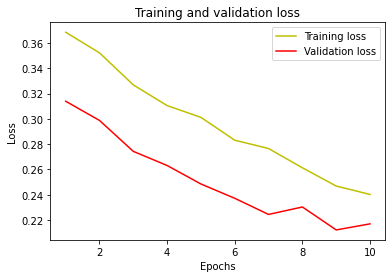

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

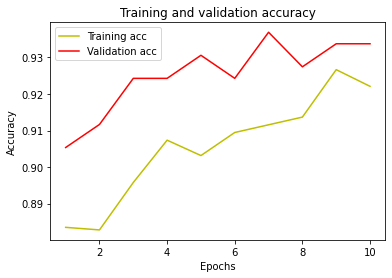

In [194]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [195]:
new_model.evaluate(X_test_LA, y_test_LA)
y_pred = new_model.predict(X_test_LA)

33/33 [==============================] - 1s 2ms/step
